## Testing PMCMC

In this notebook, we generate synthetic SIRH data. Then, we use PMCMC to infer the transmission rate. 

The likelihood function used within the PF is negative binomial. The MCMC suggests a dispersion parameter (`r`) at each iteration. 

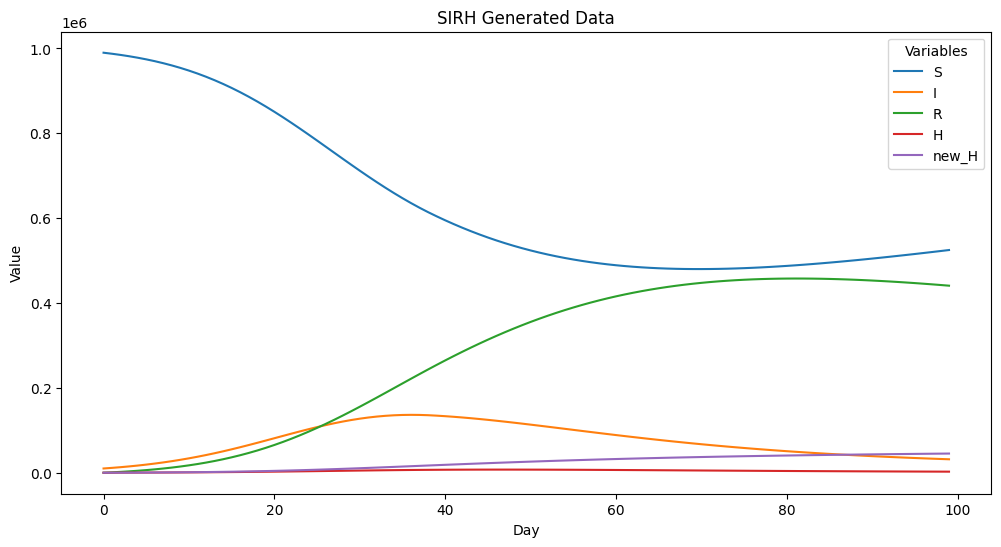

In [1]:
import src.particle_filter.plotting

"""This cell generates synthetic data."""

from src.particle_filter.transition import (
    Transition,
    OUModel,
)
from jax.random import PRNGKey
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt

days = 100
step_beta_switch = 40

initial_beta = 0.25
final_beta = 0.15

# Create a linear decline from initial_beta to final_beta
linear_decline = np.linspace(initial_beta, final_beta, step_beta_switch)

# Combine the declining part with the final constant value
step_beta = np.concatenate([linear_decline, [final_beta] * (days - step_beta_switch)])

pop = 1000000
infected = 0.01 * pop
susceptible = pop - infected
initial_state = jnp.array([susceptible, infected, 0, 0, 0, 0.3])
key = PRNGKey(0)

import paths
import os

config_path = os.path.join(paths.PF_DIR, "config.toml")

ou_model = OUModel(config_path)

det_output = [initial_state.copy()]
case_reports = [0]


def det_update(state, time_step):
    state = state.at[5].set(step_beta[time_step])
    update = ou_model.det_component(state, time_step)
    case_reports.append(update[4].item())
    state += update
    return state


for t in range(1, days):
    det_output.append(det_update(det_output[-1], t))


def plot_output(output):
    data = np.array(output)
    labels = ["S", "I", "R", "H", "new_H"]
    # Create a plot for each variable
    plt.figure(figsize=(12, 6))

    # for each day
    for i in range(data.shape[1] - 1):
        # plot each compartment
        plt.plot(range(data.shape[0]), data[:, i], label=labels[i])

    plt.title("SIRH Generated Data")
    plt.xlabel("Day")
    plt.ylabel("Value")
    plt.legend(title="Variables")
    plt.show()


plot_output(det_output)

In [2]:
from src.particle_filter.pmcmc import PMCMC
from os import path
import toml
from src.particle_filter.prior import UniformPrior
from functools import partial

location_info = {
    "population": pop,
    "location_code": "04",
    "target_date": "2047-10-28",
    "runtime": days,
}

config_path = path.join(paths.PF_DIR, "config.toml")
config = toml.load(config_path)

prior = UniformPrior()

pmcmc_algo = PMCMC(
    iterations=config["mcmc"]["iterations"],
    init_theta=config["mcmc"]["initial_theta"],
    prior=prior,
    location_info=location_info,
    observation_data=case_reports,
)

Running Particle Filter:   0%|          | 0/100 [00:00<?, ?it/s]

### Testing with 50 iterations, 50 particles

In [3]:
pmcmc_algo.run()

PMCMC Progress:   0%|          | 0/49 [00:00<?, ?it/s]

Running Particle Filter:   0%|          | 0/100 [00:00<?, ?it/s]

Running Particle Filter:   0%|          | 0/100 [00:00<?, ?it/s]

Running Particle Filter:   0%|          | 0/100 [00:00<?, ?it/s]

Running Particle Filter:   0%|          | 0/100 [00:00<?, ?it/s]

Running Particle Filter:   0%|          | 0/100 [00:00<?, ?it/s]

Running Particle Filter:   0%|          | 0/100 [00:00<?, ?it/s]

Running Particle Filter:   0%|          | 0/100 [00:00<?, ?it/s]

Running Particle Filter:   0%|          | 0/100 [00:00<?, ?it/s]

Running Particle Filter:   0%|          | 0/100 [00:00<?, ?it/s]

Running Particle Filter:   0%|          | 0/100 [00:00<?, ?it/s]

Running Particle Filter:   0%|          | 0/100 [00:00<?, ?it/s]

Running Particle Filter:   0%|          | 0/100 [00:00<?, ?it/s]

Running Particle Filter:   0%|          | 0/100 [00:00<?, ?it/s]

Running Particle Filter:   0%|          | 0/100 [00:00<?, ?it/s]

Running Particle Filter:   0%|          | 0/100 [00:00<?, ?it/s]

Running Particle Filter:   0%|          | 0/100 [00:00<?, ?it/s]

Running Particle Filter:   0%|          | 0/100 [00:00<?, ?it/s]

Running Particle Filter:   0%|          | 0/100 [00:00<?, ?it/s]

Running Particle Filter:   0%|          | 0/100 [00:00<?, ?it/s]

Running Particle Filter:   0%|          | 0/100 [00:00<?, ?it/s]

Running Particle Filter:   0%|          | 0/100 [00:00<?, ?it/s]

Running Particle Filter:   0%|          | 0/100 [00:00<?, ?it/s]

Running Particle Filter:   0%|          | 0/100 [00:00<?, ?it/s]

Running Particle Filter:   0%|          | 0/100 [00:00<?, ?it/s]

Running Particle Filter:   0%|          | 0/100 [00:00<?, ?it/s]

Running Particle Filter:   0%|          | 0/100 [00:00<?, ?it/s]

Running Particle Filter:   0%|          | 0/100 [00:00<?, ?it/s]

Running Particle Filter:   0%|          | 0/100 [00:00<?, ?it/s]

Running Particle Filter:   0%|          | 0/100 [00:00<?, ?it/s]

Running Particle Filter:   0%|          | 0/100 [00:00<?, ?it/s]

Running Particle Filter:   0%|          | 0/100 [00:00<?, ?it/s]

Running Particle Filter:   0%|          | 0/100 [00:00<?, ?it/s]

Running Particle Filter:   0%|          | 0/100 [00:00<?, ?it/s]

Running Particle Filter:   0%|          | 0/100 [00:00<?, ?it/s]

Running Particle Filter:   0%|          | 0/100 [00:00<?, ?it/s]

Running Particle Filter:   0%|          | 0/100 [00:00<?, ?it/s]

Running Particle Filter:   0%|          | 0/100 [00:00<?, ?it/s]

Running Particle Filter:   0%|          | 0/100 [00:00<?, ?it/s]

Running Particle Filter:   0%|          | 0/100 [00:00<?, ?it/s]

Running Particle Filter:   0%|          | 0/100 [00:00<?, ?it/s]

Running Particle Filter:   0%|          | 0/100 [00:00<?, ?it/s]

Running Particle Filter:   0%|          | 0/100 [00:00<?, ?it/s]

Running Particle Filter:   0%|          | 0/100 [00:00<?, ?it/s]

Running Particle Filter:   0%|          | 0/100 [00:00<?, ?it/s]

Running Particle Filter:   0%|          | 0/100 [00:00<?, ?it/s]

Running Particle Filter:   0%|          | 0/100 [00:00<?, ?it/s]

Running Particle Filter:   0%|          | 0/100 [00:00<?, ?it/s]

Running Particle Filter:   0%|          | 0/100 [00:00<?, ?it/s]

Running Particle Filter:   0%|          | 0/100 [00:00<?, ?it/s]

In [4]:
import src.particle_filter.plotting

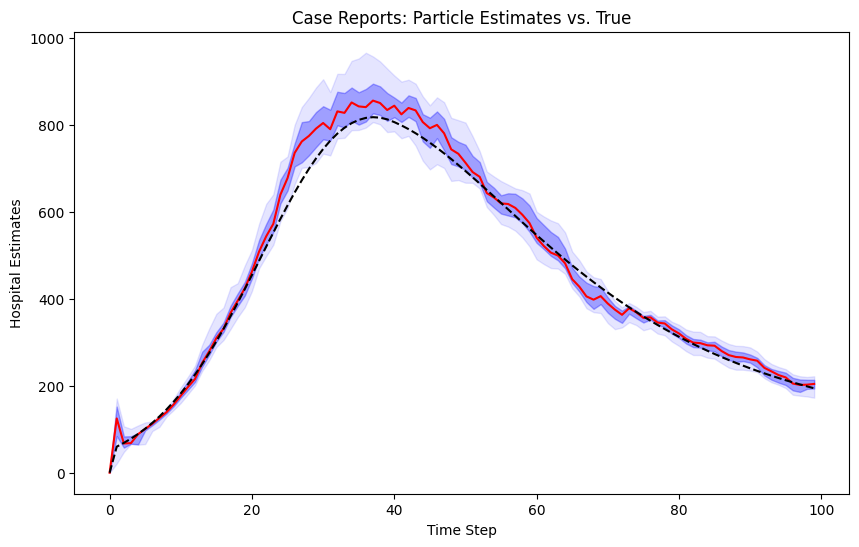

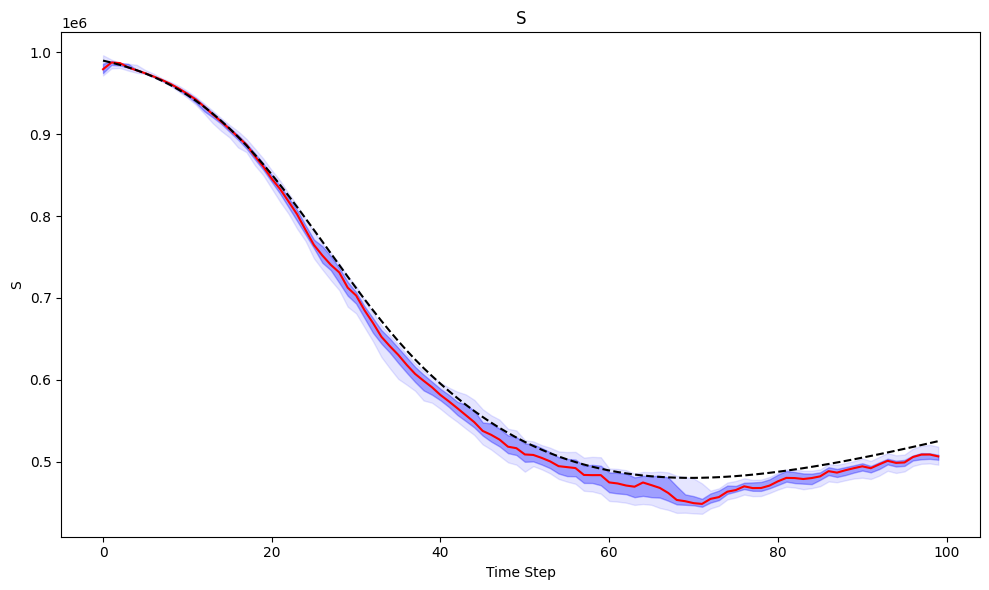

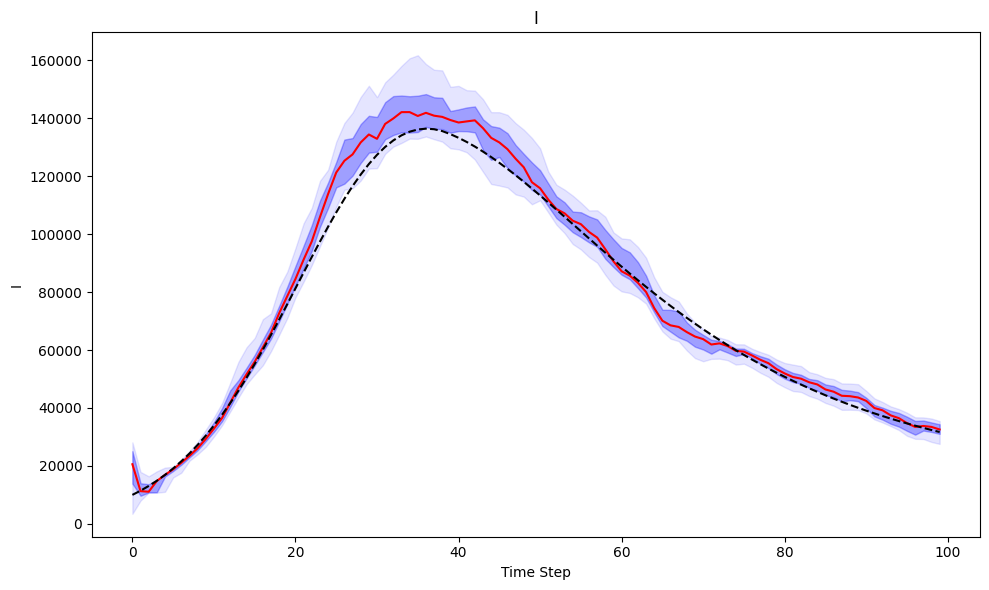

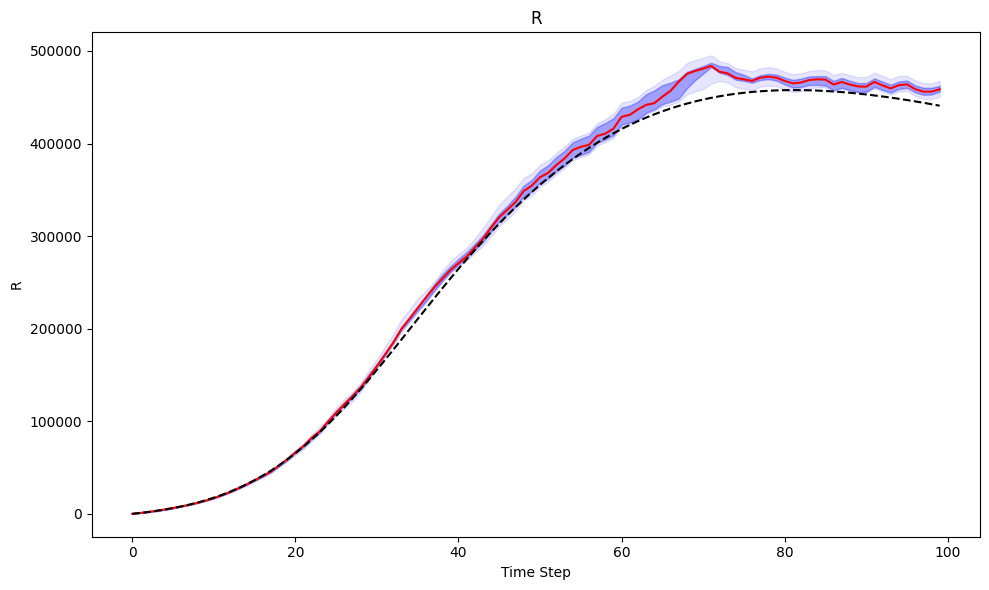

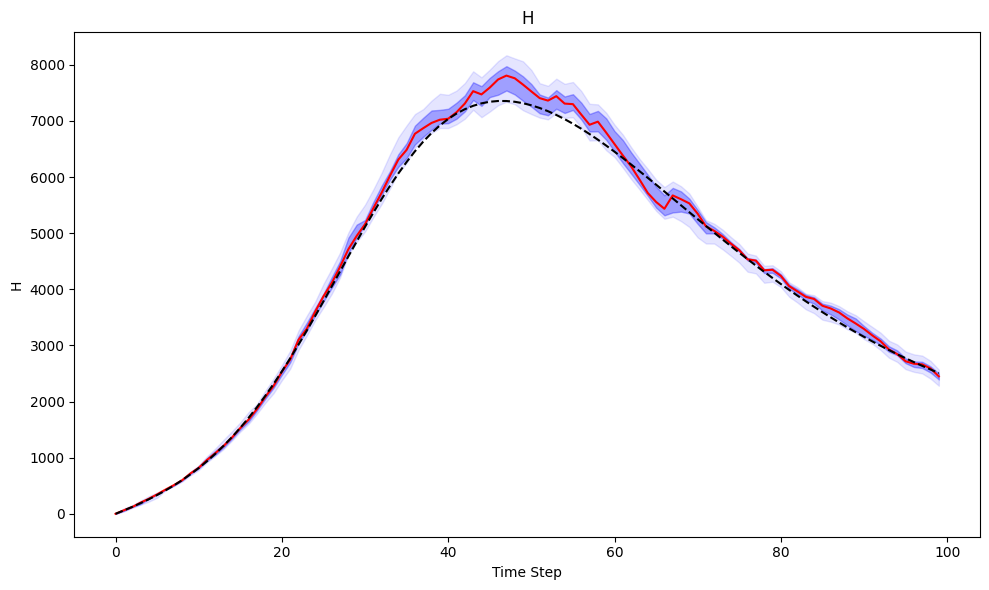

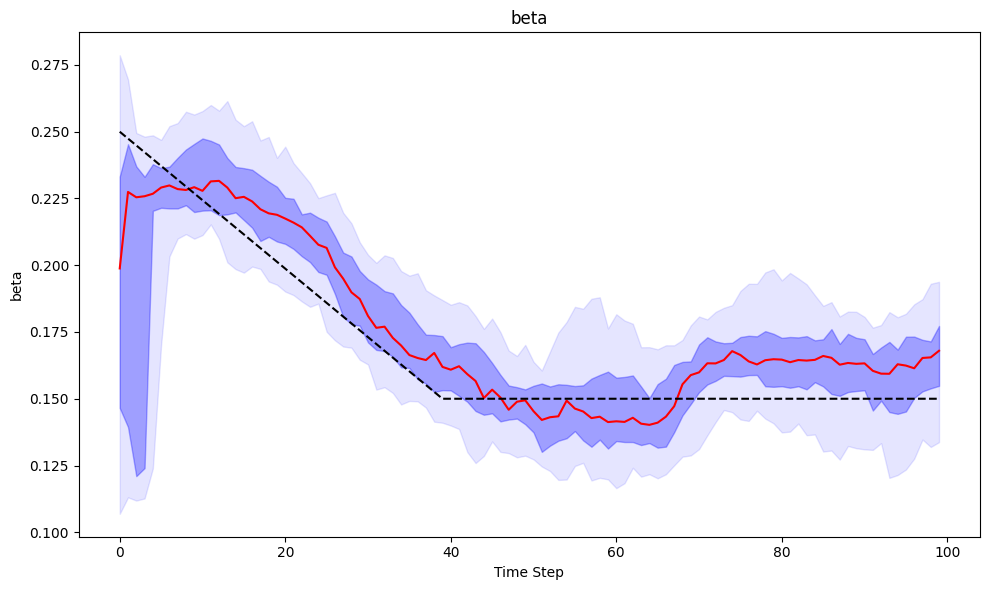

In [5]:
import importlib

importlib.reload(src.particle_filter.plotting)
from src.particle_filter.plotting import generate_plots


generate_plots(
    generated_data=det_output,
    true_beta=step_beta,
    particle_estimates=pmcmc_algo.mle_hospitalizations,
    reported_hosp=case_reports,
    pf_states=pmcmc_algo.mle_states,
)

In [6]:
pmcmc_algo

In [11]:
import jax.numpy as jnp

print("Acceptance Record:")
print(jnp.mean(pmcmc_algo._accept_record).item())

Acceptance Record:
0.5799999833106995


In [13]:
print("theta values at each iteration:")
print(pmcmc_algo._thetas)

theta values at each iteration:
[[10.       10.       12.312723 12.312723 12.312723 12.993292 12.993292
  12.993292 12.993292 12.993292 12.993292 13.419486 13.302338 13.302338
  16.394098 20.016062 20.016062 21.065428 23.7452   24.348545 24.676294
  27.853733 27.30852  26.894178 28.662159 28.662159 28.662159 28.353642
  34.048126 34.33968  34.33968  34.33968  34.33968  33.72357  38.42506
  41.796387 42.035446 46.35626  46.881973 49.150223 51.26682  51.26682
  55.01028  54.38963  54.38963  54.38963  55.845734 55.845734 55.845734
  59.383987]]


It had not yet converged. We need many more iterations. Need to optimize the code, and run it on Monsoon HPC. 